<a href="https://colab.research.google.com/github/tirunap/ML-Project/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
files.upload()

Saving titanic.csv to titanic.csv


{'titanic.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import cross_val_score

## Data Loading and Preprocessing

In [66]:
train_df = pd.read_csv('titanic.csv')

In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [15]:
train_df.shape

(891, 12)

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
print(format(sum(train_df.duplicated())))

0


In [14]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [19]:
print(train_df['Cabin'].mode())

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object


In [23]:
train_df['Cabin'].fillna(train_df['Cabin'].mode()[0], inplace=True)
train_df.dropna(subset=['Age','Embarked'], inplace=True)

In [25]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [67]:
#making env. for labelencoder()
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
train_df['Sex']

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [28]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
X=train_df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Embarked'])
y=train_df['Survived']

In [37]:
#Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, y_train.shape, y_test.shape


((569, 6), (569,), (143,))

In [41]:
#Scale the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Linear Regression Model

In [46]:
model=LinearRegression()

# Fit the model to the training data.
model.fit(X_train, y_train)

LinearRegression()

In [47]:
# Make predictions on the testing data.
y_pred = model.predict(X_test)

r2_score calculates the R-squared score, a statistical measure that represent the proportion of the value for dependet variable that can be explained by the independent variable. which is explained by an independent variable or varibale in a regression mmodel, here y_test is the actual values, and y_pred is the predicted values is the predicted values from your model.


In [48]:
#Caculate R Squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

# Calculate Mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")

# Calculate Root mean squared error
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")

R-squared: 0.3185
Mean squared error: 0.1680
Root mean squared error: 0.4098


In [49]:
# Compute the Correlation Matrix
corr_matrix = X.corr()

# Identify pairs of features with high collinearity
high_corr_features = [(col1, col2, corr_matrix.loc[col1, col2])
                     for col1 in corr_matrix.columns
                     for col2 in corr_matrix.columns
                     if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > 0.8]

# Convert to a DataFrame for better visualization.
collinearity_df = pd.DataFrame(high_corr_features, columns=["Feature 1", "Feature 2", "Correlation"])
print("\nHighly Correlated Features:\n", collinearity_df)


Highly Correlated Features:
 Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


##Variance Inflation Factor
### The Variance Inflation Factor (VIF) quantifies how much the variance of a regression coefficient is inflated due to multicollinearity among predictor variables.

In [50]:
# Compute Variance Inflation Factor (VIF) for each feature.
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


# Print VIF values.
print("\nVariance Inflation Factor (VIF) for each feature:\n", vif_data)


Variance Inflation Factor (VIF) for each feature:
   Feature       VIF
0  Pclass  4.330115
1     Sex  3.002154
2     Age  3.748489
3   SibSp  1.622903
4   Parch  1.611383
5    Fare  1.657340


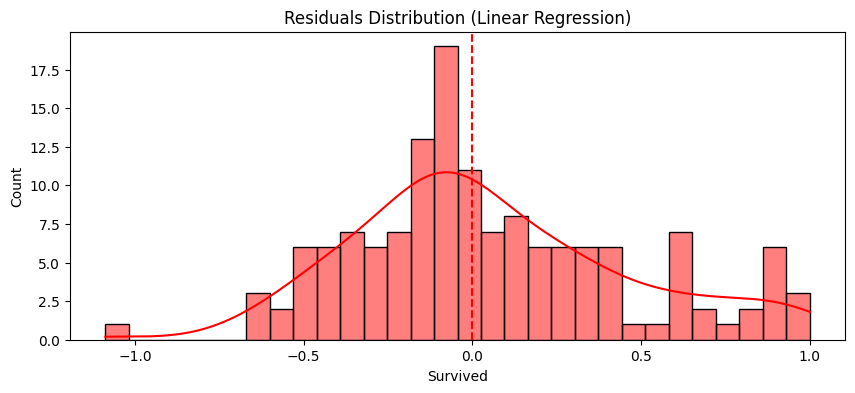

In [51]:
# Residual distribution
residuals = y_test - y_pred
plt.figure(figsize=(10,4))
sns.histplot(residuals, bins=30, kde=True, color="red")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution (Linear Regression)")
plt.show()

##Logistics Regression

In [54]:
# LogisticRegression model
LR = LogisticRegression(random_state=16, max_iter=1000)

# fit the model with data
LR.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=16)

In [55]:
y_pred = LR.predict(X_test)

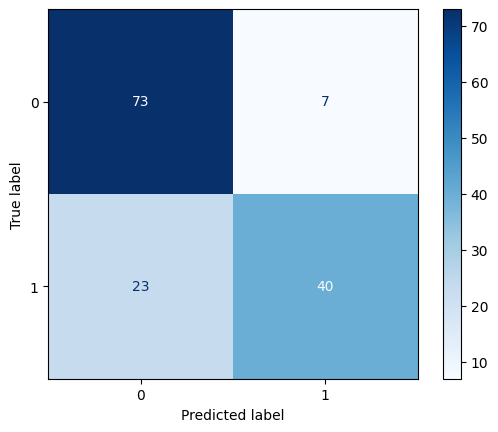


Accuracy:,  0.790210
Precision:,  0.851064
Recall:  0.634921
F1-score:  0.727273

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        80
           1       0.85      0.63      0.73        63

    accuracy                           0.79       143
   macro avg       0.81      0.77      0.78       143
weighted avg       0.80      0.79      0.78       143



In [57]:
#Create the confusion_matrix
cm = confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot(cmap='Blues')
plt.show()

#calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAccuracy:, {accuracy: 4f}")
print(f"Precision:, {precision: 4f}")
print(f"Recall: {recall: 4f}")
print(f"F1-score: {f1: 4f}")

#Classicaficaiton report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

##Testing

In [60]:
from google.colab import files
files.upload()

Saving test.csv to test.csv


{'test.csv': b'PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q\r\n893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7,,S\r\n894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,,Q\r\n895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,,S\r\n896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,,S\r\n897,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.225,,S\r\n898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,,Q\r\n899,2,"Caldwell, Mr. Albert Francis",male,26,1,1,248738,29,,S\r\n900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,,C\r\n901,3,"Davies, Mr. John Samuel",male,21,2,0,A/4 48871,24.15,,S\r\n902,3,"Ilieff, Mr. Ylio",male,,0,0,349220,7.8958,,S\r\n903,1,"Jones, Mr. Charles Cresson",male,46,0,0,694,26,,S\r\n904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23,1,0,21228,82.2667,B45,S\r\n905,2,"Howard, Mr. Benja

In [68]:
test_df = pd.read_csv("test.csv")

test_df['Cabin'].fillna(train_df['Cabin'].mode()[0], inplace=True)
test_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

# Ensure 'Sex' column in test_df is of string type before encoding
test_df['Sex'] = test_df['Sex'].astype(str)

# Encoding for column 'Sex'
test_df['Sex'] = le.transform(test_df['Sex'])

# Drop unnecessary columns
X_test_final = test_df.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'])

# checkin null values in the test set
X_test_final.isnull().sum()

# Scale the test data
X_test_final_scaled = scaler.transform(X_test_final)

# Predict on test data
test_pred = LR.predict(X_test_final_scaled)

##Gradient Boost Classifier
###It builds an additive model in a forward stage-wise manner, optimizing arbitrary differentiable loss functions. The Gradient Boosting Classifier in scikit-learn is a popular implementation of this algorithm.

###Gradient Boosting combines several weak learners, typically decision trees, into a strong learner. Each new model is trained to minimize the loss function of the previous model using gradient descent. The predictions of the new model are added to the ensemble, and the process is repeated until a stopping criterion is met.



In [69]:
GB = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
GB.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=200,
                           random_state=42)

In [70]:
y_pred = GB.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7692307692307693


##Random Forest Model
###It is a machine learning algorithm that uses many decision trees to make better predictions. Each tree looks at different random parts of the data and their results are combined by voting for classification or averaging for regression which makes it as ensemble learning technique. This helps in improving accuracy and reducing errors.

###RFM is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees. Feature randomness, also known as feature bagging or “the random subspace method”, generates a random subset of features, which ensures low correlation among decision trees. This is a key difference between decision trees and random forests. While decision trees consider all the possible feature splits, random forests only select a subset of those features.

In [71]:
RF = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
RF.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_estimators=200, random_state=42)

In [72]:
y_pred = RF.predict(X_test)

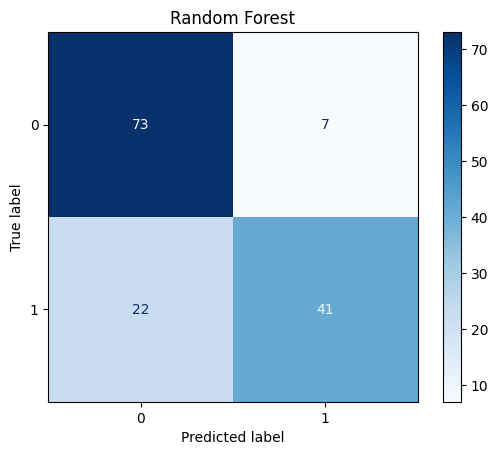

Accuracy: 0.7972
Precision: 0.8542
Recall: 0.6508
F1 Score: 0.7387


In [73]:
# Evaluate performance
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Random Forest')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [76]:
df_gender_submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_pred})



In [77]:
df_gender_submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
